Вероятностные характеристики процесса размножения-гибели.

Моделирование процесса с оценкой «по столкновениям».

Моделирование процесса «хищник - жертва».

In [8]:
import matplotlib.pyplot as plt
from typing import Generator
from itertools import islice

import random
import numpy as np

import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [3]:
def binomial_generator(n: int = 4, p: float = 0.5) -> Generator[int, None, None]:
    while True:
        k = 0
        for i in range(n):
            if random.random() < p:
                k += 1
        yield k

In [15]:
def generations_mean(n: int, p: float, n_0: int = 10, n_generations: int = 5, n_repeats: int = 10) -> np.ndarray:
    gen = binomial_generator(n=n, p=p)

    generations = np.zeros((n_repeats, n_generations), dtype=int)
    generations[:, 0] = n_0
    for i in range(n_repeats):
        for j in range(1, n_generations):
            generations[i][j] = sum(islice(gen, generations[i][j - 1]))
    return np.mean(generations, axis=0).astype(int)


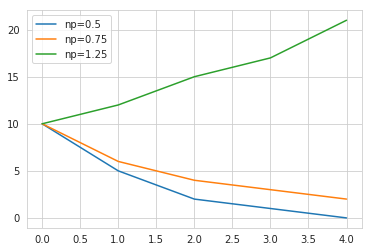

In [16]:
for n in (2, 3, 5):
    for p in (0.25, ):
        plt.plot(generations_mean(n, p), label=f'np={n * p}')

plt.legend()
plt.show()
